In [107]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
from astropy.table import Table
from desitarget.targetmask import desi_mask
import os 
%matplotlib inline

In [108]:
datapath = "/global/cscratch1/sd/forero/testfiber/dark_large/fiber_output/"
tiles = glob.glob(datapath+"*.fits")
print('Total numer of tiles:', len(tiles))

Total numer of tiles: 7098


In [109]:
def count_targets(tilefile):
    
    tileid = int(tilefile.split('_')[-1].split('.')[0])
    
    # mask for sky targets
    sky_mask = desi_mask.SKY
    
    # mask for stdstar targets
    std_mask = 0
    for name in ['STD', 'STD_FSTAR', 'STD_WD',
             'STD_FAINT', 'STD_FAINT_BEST',
             'STD_BRIGHT', 'STD_BRIGHT_BEST']:
        if name in desi_mask.names():
            std_mask |= desi_mask[name]

    # This is the field with the assignments
    assigned = Table.read(tilefile, 'FIBERASSIGN')
    
    # This is the field with the potential assigments
    potential = Table.read(tilefile, 'POTENTIAL')

    # Unassigned fibers have TARGETID==-1
    nassigned = len(assigned)-np.count_nonzero(assigned['TARGETID']==-1)
    
    # find whether a sky or stdstar target has been assigned
    nstd = np.count_nonzero(assigned['DESI_TARGET'] & std_mask)
    nsky = np.count_nonzero(assigned['DESI_TARGET'] & sky_mask)
    npotential = len(potential)

    # the number of science targets assigned
    nscience = nassigned - nstd - nsky
    
    
    return {'tileid':tileid,
            'RA':np.median(assigned['TARGET_RA']),
            'DEC':np.median(assigned['TARGET_DEC']),
            'npotential':npotential, 'nscience':nscience, 'nstd':nstd, 'nsky':nsky}

In [110]:
if not os.path.isfile('tile_counts.txt'):
    n_tiles = len(tiles)
    count_all = {}
    for i in range(n_tiles):
        count_all[i] = count_targets(tiles[i])
        if not(i % (n_tiles//100)):
            print("{:}%  ".format(int(100.0*i/n_tiles)), end="\b")

In [111]:
def write_counts(count_all, outfile = 'tile_counts.txt'):
    f  = open(outfile, 'w')
    f.write("# TILEID RA DEC NSKY NSTD NSCIENCE NPOTENTIAL\n")
    n_tiles = len(count_all)
    for i in range(n_tiles):
        f.write("{:d}\t".format(count_all[i]['tileid']))
        f.write("{:.2f}\t".format(count_all[i]['RA']))
        f.write("{:.2f}\t".format(count_all[i]['DEC']))
        f.write("{:d}\t".format(count_all[i]['nsky']))
        f.write("{:d}\t".format(count_all[i]['nstd']))
        f.write("{:d}\t".format(count_all[i]['nscience']))
        f.write("{:d}\t".format(count_all[i]['npotential']))
        f.write("\n")
    f.close()

In [112]:
write_counts(count_all)

In [113]:
counts = Table.read('tile_counts.txt', format='ascii')

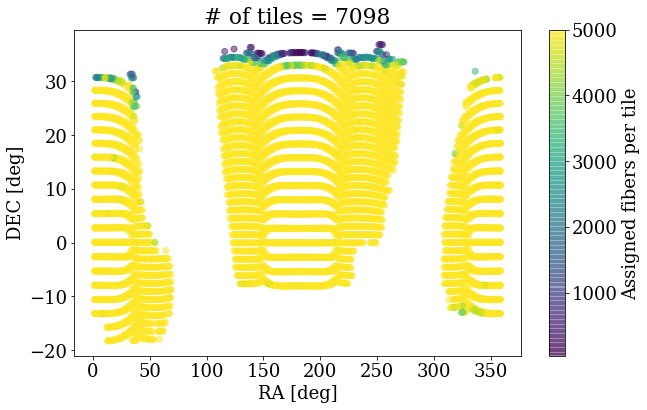

In [114]:
plt.figure(figsize=(10,6))
plt.rc('text', usetex=False,)
plt.rc('font', family='serif', size=18)
ii = (counts['NSKY']+counts['NSTD']+counts['NSCIENCE']) == 5000
plt.scatter(counts['RA'], counts['DEC'], c=counts['NSKY']+counts['NSTD']+counts['NSCIENCE'], alpha=0.5)
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.colorbar(label = "Assigned fibers per tile")
plt.title('# of tiles = {}'.format(len(counts['NSKY'])))
plt.savefig('doc/assigned_ra_dec.pdf', bbox_inches='tight')

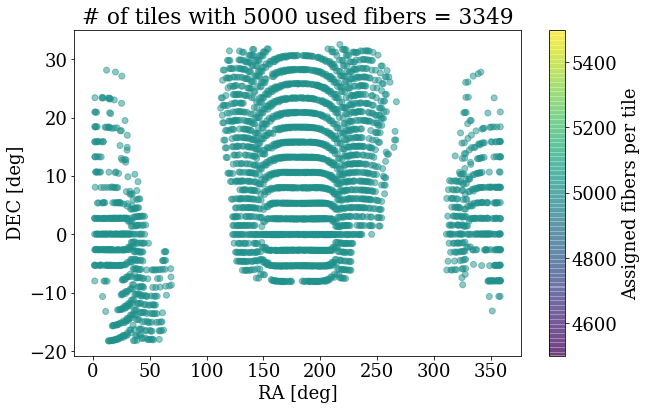

In [97]:
plt.figure(figsize=(10,6))
plt.rc('text', usetex=False,)
plt.rc('font', family='serif', size=18)
ii = (counts['NSKY']+counts['NSTD']+counts['NSCIENCE']) == 5000
plt.scatter(counts['RA'][ii], counts['DEC'][ii], c=counts['NSKY'][ii]+counts['NSTD'][ii]+counts['NSCIENCE'][ii], alpha=0.5)
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.colorbar(label = "Assigned fibers per tile")
plt.title('# of tiles with 5000 used fibers = {}'.format(np.count_nonzero(ii)))
plt.savefig('doc/assigned_ra_dec_exact.pdf', bbox_inches='tight')

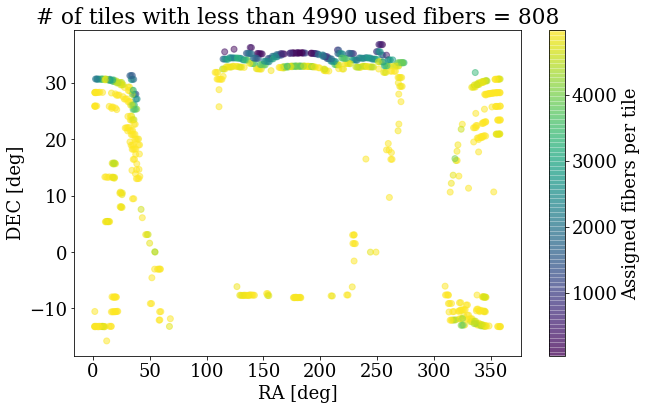

In [106]:
plt.figure(figsize=(10,6))
plt.rc('text', usetex=False,)
plt.rc('font', family='serif', size=18)
ii = (counts['NSKY']+counts['NSTD']+counts['NSCIENCE']) < 4990
plt.scatter(counts['RA'][ii], counts['DEC'][ii], c=counts['NSKY'][ii]+counts['NSTD'][ii]+counts['NSCIENCE'][ii], alpha=0.5)
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.colorbar(label = "Assigned fibers per tile")
plt.title('# of tiles with less than 4990 used fibers = {}'.format(np.count_nonzero(ii)))
plt.savefig('doc/assigned_ra_dec_less.pdf', bbox_inches='tight')

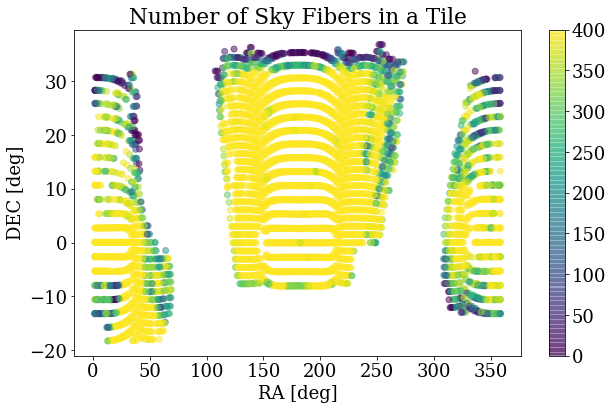

In [30]:
plt.figure(figsize=(10,6))
plt.rc('text', usetex=False,)
plt.rc('font', family='serif', size=18)
ii = all_sky<=400
plt.scatter(all_ra[ii], all_dec[ii], c=all_sky[ii], alpha=0.5)
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.colorbar()
plt.title('Number of Sky Fibers in a Tile')
plt.savefig('doc/assigned_sky_ra_dec_less.pdf', bbox_inches='tight')

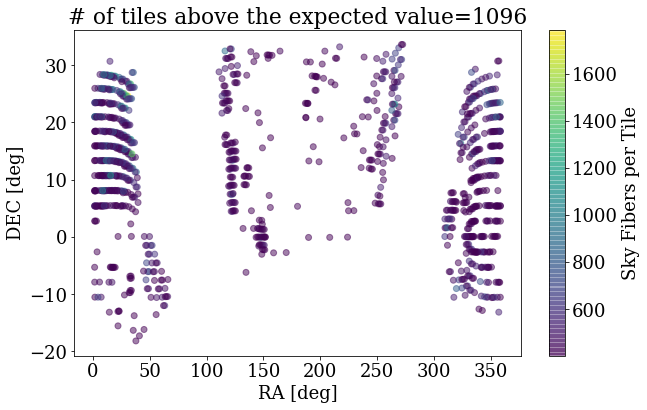

In [58]:
plt.figure(figsize=(10,6))
plt.rc('text', usetex=False,)
plt.rc('font', family='serif', size=18)
ii = all_sky > 400
plt.scatter(all_ra[ii], all_dec[ii], c=all_sky[ii], alpha=0.5)
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.colorbar(label="Sky Fibers per Tile")
plt.title('# of tiles above the expected value={}'.format(np.count_nonzero(ii)))
plt.savefig('doc/assigned_sky_ra_dec_above.pdf', bbox_inches='tight')

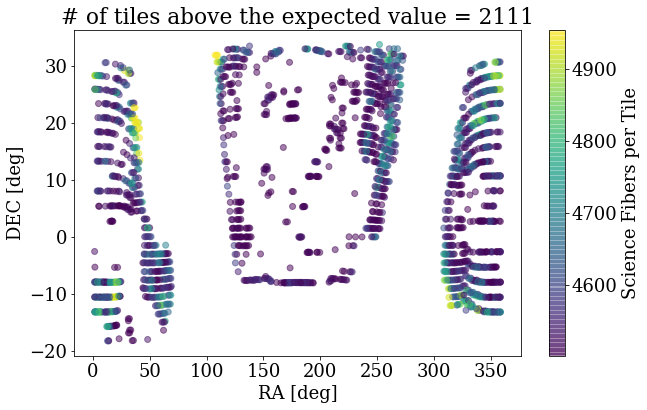

In [57]:
plt.figure(figsize=(10,6))
plt.rc('text', usetex=False,)
plt.rc('font', family='serif', size=18)
ii = all_science > 4500
plt.scatter(all_ra[ii], all_dec[ii], c=all_science[ii], alpha=0.5)
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.colorbar(label="Science Fibers per Tile")
plt.title('# of tiles above the expected value = {}'.format(np.count_nonzero(ii)))
plt.savefig('doc/assigned_science_ra_dec_above.pdf', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(10,6))
plt.rc('text', usetex=False,)
plt.rc('font', family='serif', size=18)
plt.scatter(all_ra, all_dec, c=all_std, alpha=0.5)
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.colorbar()
plt.title('Number of Assigned Fibers in a Tile')
plt.savefig('doc/assigned_science_ra_dec.pdf', bbox_inches='tight')

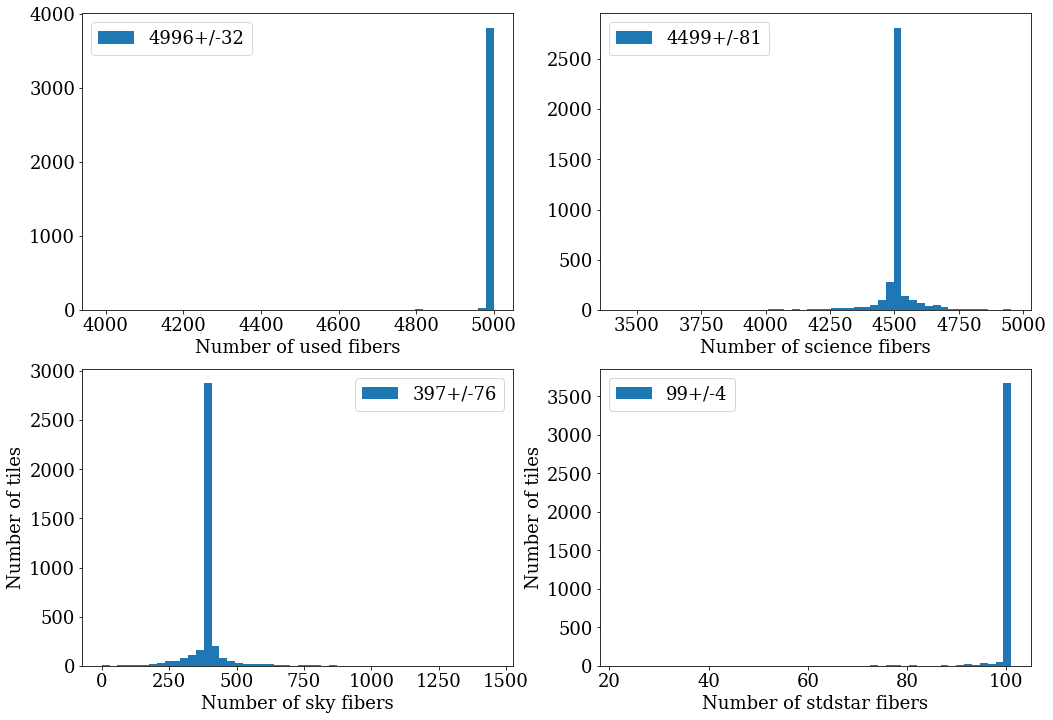

In [248]:
plt.figure(figsize=(17,12))

ii = (all_dec < 20) & (all_dec >-5)
all_used = all_science+all_sky+all_std
plt.subplot(2,2,1)
n = np.int(np.mean(all_used[ii]))
s = np.int(np.std(all_used[ii]))
_ = plt.hist(all_used[ii], bins=50, label='{}+/-{}'.format(n,s))
plt.xlabel('Number of used fibers')
plt.legend()


plt.subplot(2,2,2)
n = np.int(np.mean(all_science[ii]))
s = np.int(np.std(all_science[ii]))
_ = plt.hist(all_science[ii], bins=50, label='{}+/-{}'.format(n,s))
plt.xlabel('Number of science fibers')
plt.legend()



plt.subplot(2,2,3)
n = np.int(np.mean(all_sky[ii]))
s = np.int(np.std(all_sky[ii]))
_ = plt.hist(all_sky[ii], bins=50, label='{}+/-{}'.format(n,s))
plt.xlabel('Number of sky fibers')
plt.ylabel('Number of tiles')

plt.legend()


plt.subplot(2,2,4)
n = np.int(np.mean(all_std[ii]))
s = np.int(np.std(all_std[ii]))
_ = plt.hist(all_std[ii], bins=50, label='{}+/-{}'.format(n,s))
plt.xlabel('Number of stdstar fibers')
plt.ylabel('Number of tiles')

plt.legend()
plt.savefig('doc/used_fibers.pdf', bbox_inches='tight')

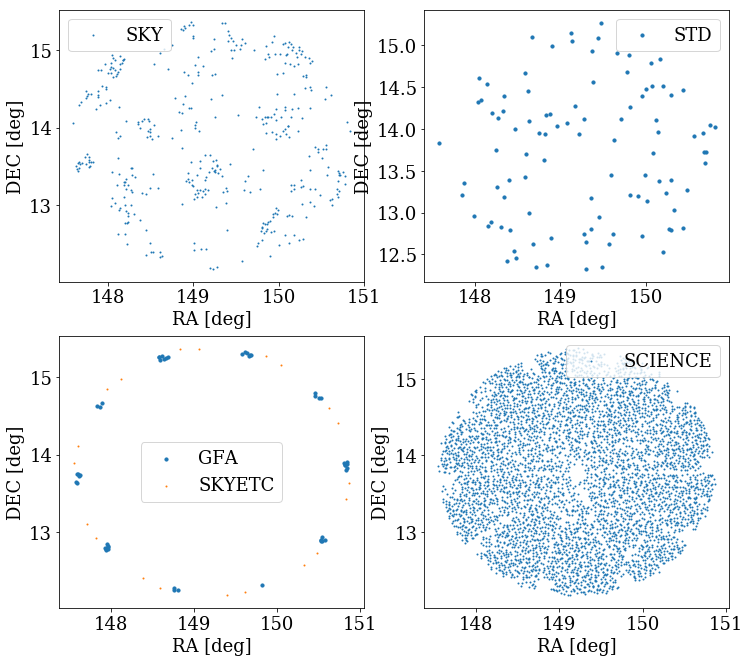

In [246]:
plt.figure(figsize=(12,11))

tilefile = tiles[200]
assigned = Table.read(tilefile, 'FIBERASSIGN')
gfa = Table.read(tilefile, 'GFA')
skyetc = Table.read(tilefile, 'SKYETC')


# mask for sky targets
sky_mask = desi_mask.SKY
    
# mask for stdstar targets
std_mask = 0
for name in ['STD', 'STD_FSTAR', 'STD_WD',
             'STD_FAINT', 'STD_FAINT_BEST',
             'STD_BRIGHT', 'STD_BRIGHT_BEST']:
    if name in desi_mask.names():
            std_mask |= desi_mask[name]


    # find whether a sky or stdstar target has been assigned
ii_sky = (assigned['DESI_TARGET'] & sky_mask)!=0
ii_std = (assigned['DESI_TARGET'] & std_mask)!=0

plt.subplot(2,2,1)
plt.scatter(assigned['TARGET_RA'][ii_sky], assigned['TARGET_DEC'][ii_sky], s=1.0, label='SKY')
plt.legend()
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')

plt.subplot(2,2,2)
plt.scatter(assigned['TARGET_RA'][ii_std], assigned['TARGET_DEC'][ii_std], s=10.0, label='STD')
plt.legend()
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')

plt.subplot(2,2,3)
plt.scatter(gfa['RA'], gfa['DEC'], s=10.0, label='GFA')
plt.scatter(skyetc['RA'], skyetc['DEC'], s=1.0, label='SKYETC')
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.legend()

plt.subplot(2,2,4)
plt.scatter(assigned['TARGET_RA'][~(ii_sky|ii_std)], assigned['TARGET_DEC'][~(ii_sky|ii_std)], s=1.0, label='SCIENCE')
plt.legend()
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')



plt.savefig('doc/single_tile.pdf', bbox_inches='tight')

In [250]:
np.count_nonzero(ii)

3884

In [251]:
4996/5000.0

0.9992